# 无监督模型：Isolation Forest

In [18]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

In [7]:
Data = pd.read_csv(r"C:/daily/creditcard.csv")

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

Data['scaled_amount'] = rob_scaler.fit_transform(Data['Amount'].reshape(-1,1))
Data['scaled_time'] = rob_scaler.fit_transform(Data['Time'].reshape(-1,1))

Data.drop(['Time','Amount'], axis=1, inplace=True)

C:\Users\pc\ana\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\pc\ana\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [9]:
y_true=Data['Class']
df_data=Data.drop('Class',1)

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, y_true, test_size=0.3, random_state=42)

In [12]:
def train(X,clf,ensembleSize=5,sampleSize=10000):
    lis=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        lis.append(clf)
    return lis

In [13]:
def predict(X,lis):
    y_pred=np.zeros(X.shape[0])
    for clf in lis:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(lis)
    return y_pred

假设结果中有5%的异常样本

In [17]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.005, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model=train(X_train,alg)
y_pred=predict(X_test,model)

y_pred=1-y_pred
y_pred_class=y_pred.copy()
y_pred_class[y_pred>=np.percentile(y_pred,95)]=1
y_pred_class[y_pred<np.percentile(y_pred,95)]=0
roc_auc_score(y_test, y_pred_class)

0.91315264280774144

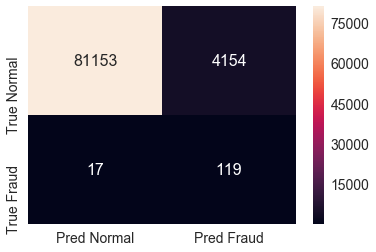

In [24]:
cm=confusion_matrix(y_test, y_pred_class)
df_cm = pd.DataFrame(cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])

sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')